In [99]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [100]:
dataflow=pd.read_csv("C:/Data_analysis/HR_comma_sep def.csv")

In [101]:
list(dataflow.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [102]:
dataflow['left'].mean()

0.2380825388359224

In [103]:
dataflow.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [104]:
from pylab import *

dataflow.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=cm.get_cmap('coolwarm'), axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0,0.11,-0.14,-0.02,-0.1,0.059,-0.39,0.026
last_evaluation,0.11,1.0,0.35,0.34,0.13,-0.0071,0.0066,-0.0087
number_project,-0.14,0.35,1.0,0.42,0.2,-0.0047,0.024,-0.0061
average_montly_hours,-0.02,0.34,0.42,1.0,0.13,-0.01,0.071,-0.0035
time_spend_company,-0.1,0.13,0.2,0.13,1.0,0.0021,0.14,0.067
Work_accident,0.059,-0.0071,-0.0047,-0.01,0.0021,1.0,-0.15,0.039
left,-0.39,0.0066,0.024,0.071,0.14,-0.15,1.0,-0.062
promotion_last_5years,0.026,-0.0087,-0.0061,-0.0035,0.067,0.039,-0.062,1.0


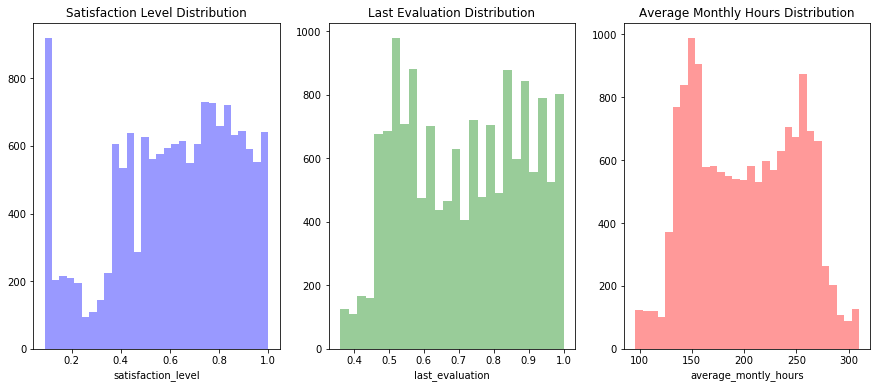

In [145]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(dataflow.satisfaction_level, kde=False, color="b", ax=axes[0]).set_title('Satisfaction Level Distribution')
sns.distplot(dataflow.last_evaluation, kde=False, color="g", ax=axes[1]).set_title('Last Evaluation Distribution')
sns.distplot(dataflow.average_montly_hours, kde=False, color="r", ax=axes[2]).set_title('Average Monthly Hours Distribution')
plt.show()

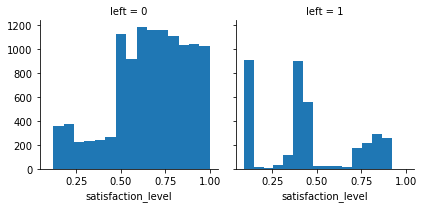

In [106]:
g = sns.FacetGrid(dataflow, col='left')
g.map(plt.hist, 'satisfaction_level', bins=15)
plt.show()

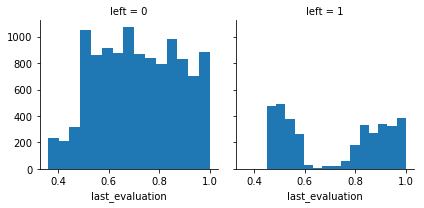

In [107]:
g = sns.FacetGrid(dataflow, col='left')
g.map(plt.hist, 'last_evaluation', bins=15)
plt.show()

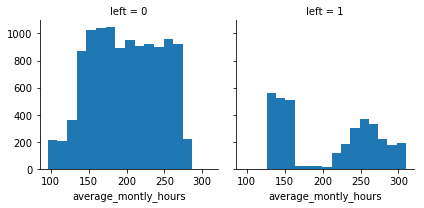

In [108]:
g = sns.FacetGrid(dataflow, col='left')
g.map(plt.hist, 'average_montly_hours', bins=15)
plt.show()

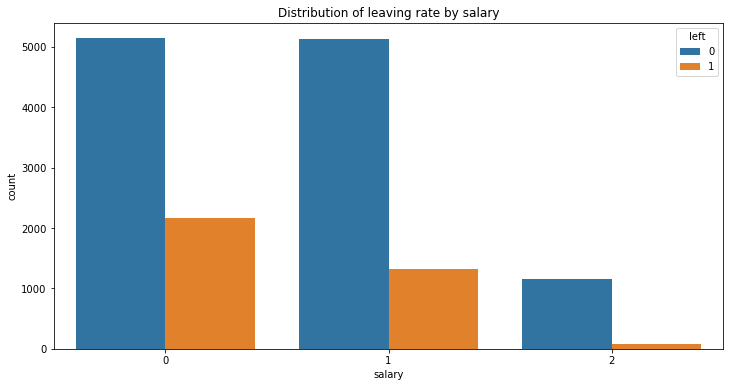

In [146]:
ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="salary", hue='left', data=dataflow).set_title('Distribution of leaving rate by salary')
plt.show()

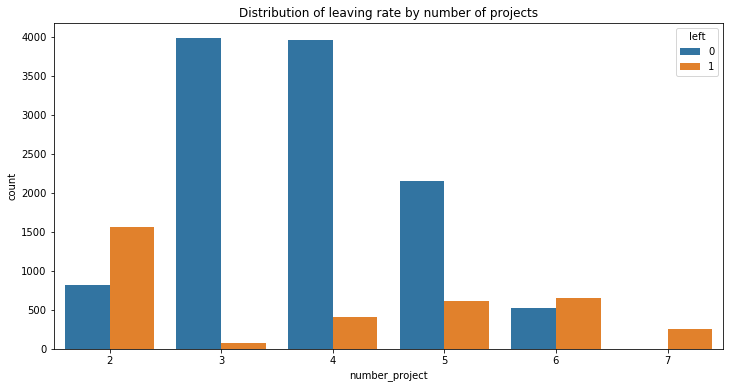

In [147]:
ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="number_project", hue='left', data=dataflow).set_title('Distribution of leaving rate by number of projects')
plt.show()

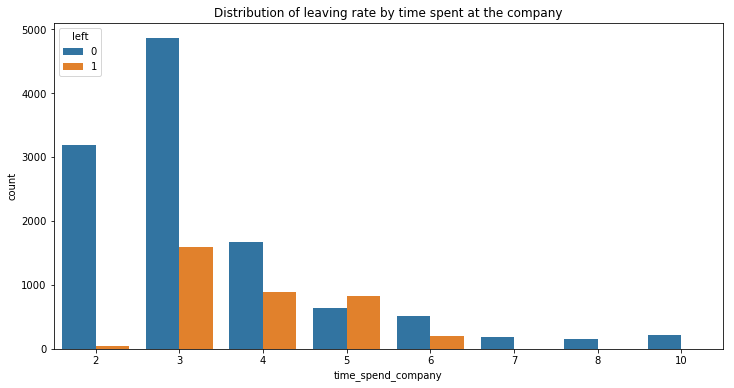

In [148]:
ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="time_spend_company", hue='left', data=dataflow).set_title('Distribution of leaving rate by time spent at the company')
plt.show()

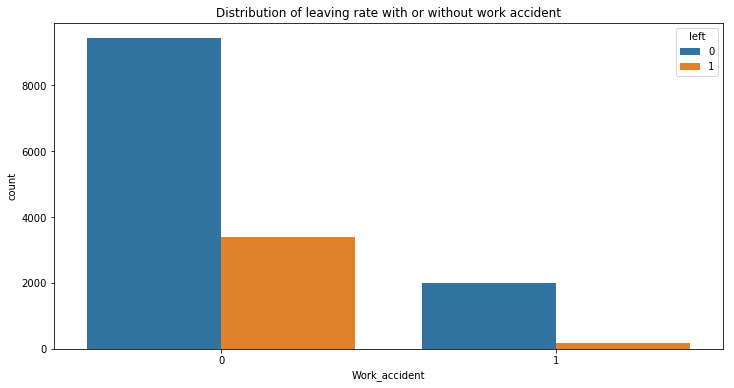

In [149]:
ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="Work_accident", hue='left', data=dataflow).set_title('Distribution of leaving rate with or without work accident')
plt.show()

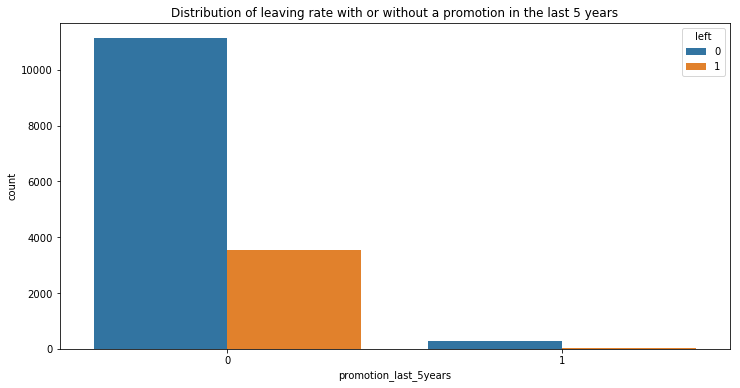

In [153]:
ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="promotion_last_5years", hue='left', data=dataflow).set_title('Distribution of leaving rate with or without a promotion in the last 5 years')
plt.show()

In [114]:
dataflow.groupby('promotion_last_5years')['left'].mean()

promotion_last_5years
0    0.241962
1    0.059561
Name: left, dtype: float64

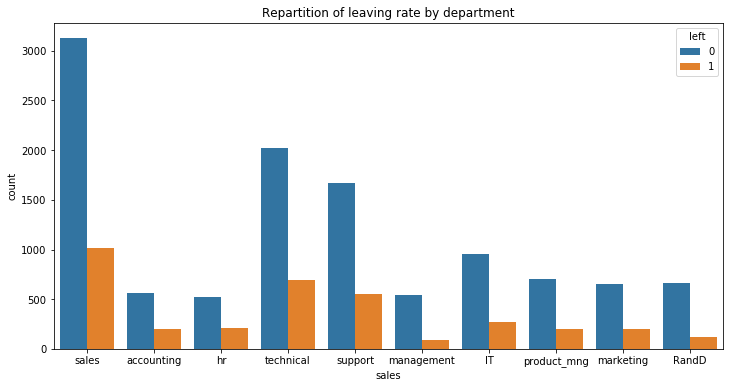

In [115]:
ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="sales", hue='left', data=dataflow).set_title('Repartition of leaving rate by department')
plt.show()

In [116]:
list(dataflow['sales'].value_counts().index.get_values())


['sales',
 'technical',
 'support',
 'IT',
 'product_mng',
 'marketing',
 'RandD',
 'accounting',
 'hr',
 'management']

In [117]:
dataflow['salary'] = dataflow['salary'].map( {'high':2 ,'medium': 1, 'low': 0} ).astype(int)

dataflow['sales'] = dataflow['sales'].map( {'sales':9 , 'technical':8 , 'support':7, 'IT':6,  'product_mng':5,  'marketing':4, 'RandD':3,  'accounting':2,  'hr':1,  'management':0} ).astype(int)
dataflow.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,9,0
1,0.80,0.86,5,262,6,0,1,0,9,1
2,0.11,0.88,7,272,4,0,1,0,9,1
3,0.72,0.87,5,223,5,0,1,0,9,0
4,0.37,0.52,2,159,3,0,1,0,9,0


In [118]:
dataflow.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.cross_validation import StratifiedKFold

X_train = dataflow.drop(labels = "left",axis = 1)
Y_train = dataflow["left"]



kfold = StratifiedKFold(Y_train,n_folds=10,random_state=2)



RFC = RandomForestClassifier()
cv_results = cross_val_score(RFC,X_train, Y_train, cv=kfold, scoring="accuracy")
cv_results.mean()


0.9914000442370569

In [120]:
RFC.fit(X_train,Y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

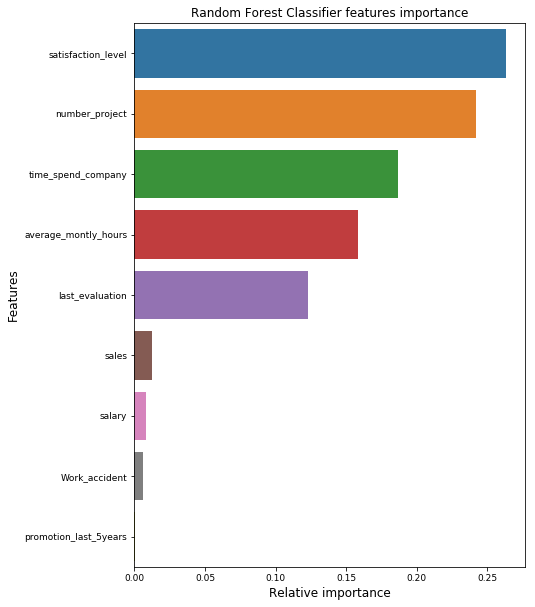

In [154]:
indices = np.argsort(RFC.feature_importances_)[::-1][:40]
train_features = X_train.columns

fig = plt.figure(figsize=(7, 10))
g = sns.barplot(y=train_features[indices][:40],x = RFC.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Random Forest Classifier features importance")

plt.show()
plt.gcf().clear()


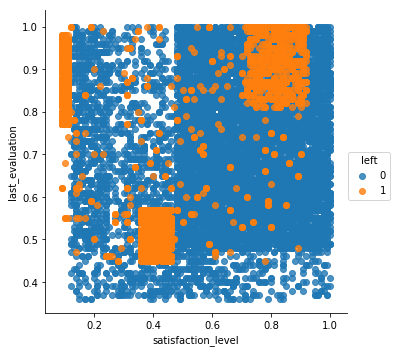

In [155]:
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=dataflow,
           fit_reg=False, # No regression line
           hue='left')   # Color by evolution stage
plt.show()

In [144]:
dataflow['left'].mean()

0.2380825388359224

In [129]:
dataflow[(dataflow['satisfaction_level']>0.36)&(dataflow['satisfaction_level']<0.5)&(dataflow['last_evaluation']>0.43)&(dataflow['last_evaluation']<=0.58)]['left'].mean()

0.8605625374027528

In [127]:
dataflow['left'].mean()

0.2380825388359224

In [131]:
dataflow[(dataflow['satisfaction_level']>0.36)&(dataflow['satisfaction_level']<0.5)&(dataflow['last_evaluation']>0.43)&(dataflow['last_evaluation']<=0.58)]['number_project'].value_counts()

2    1474
3      86
4      68
5      28
6      15
Name: number_project, dtype: int64

In [132]:
dataflow[(dataflow['satisfaction_level']>0.7)&(dataflow['satisfaction_level']<0.92)&(dataflow['last_evaluation']>0.81)&(dataflow['last_evaluation']<=1)]['left'].mean()

0.40159325210871605

In [134]:
dataflow[(dataflow['satisfaction_level']>0.7)&(dataflow['satisfaction_level']<0.92)&(dataflow['last_evaluation']>0.81)&(dataflow['last_evaluation']<=1)]['number_project'].value_counts()

4    795
5    742
3    498
2     63
6     36
Name: number_project, dtype: int64

In [141]:
dataflow[(dataflow['satisfaction_level']>0)&(dataflow['satisfaction_level']<0.12)&(dataflow['last_evaluation']>0.76)&(dataflow['last_evaluation']<=1)]['left'].mean()

1.0

In [174]:
dataflow[(dataflow['satisfaction_level']>0)&(dataflow['satisfaction_level']<0.12)&(dataflow['last_evaluation']>0.76)
         &(dataflow['last_evaluation']<=1)]['promotion_last_5years'].value_counts()

0    876
1      3
Name: promotion_last_5years, dtype: int64

In [172]:
dataflow['const'] = 1

X_train = dataflow.drop(labels = "left",axis = 1)
Y_train = dataflow["left"]

import statsmodels.api as sm
indexes = ['satisfaction_level','last_evaluation','number_project','time_spend_company','average_montly_hours', 'const']
logReg = sm.Logit(Y_train, X_train[indexes])
answer = logReg.fit()

answer.summary
answer.params



Optimization terminated successfully.
         Current function value: 0.459839
         Iterations 6


satisfaction_level     -4.134509
last_evaluation         0.762120
number_project         -0.302585
time_spend_company      0.197119
average_montly_hours    0.004359
const                   0.141992
dtype: float64

In [175]:
lc=answer.params
def proba(lc,sat,lastev,np,tsc,amh):
    p=lc[0]*sat+lc[1]*lastev+lc[2]*np+lc[3]*tsc+lc[4]*amh+lc[5]
    return(p)
prb=proba(lc,0.05,0.9,3,3,200)
np.exp(prb)/(np.exp(prb)+1)

0.7643164224548821